# Welcome to the House Rocket Data Analysis

## Finding Investment Opportunities - Analyzing Home Prices in King County, USA

# 1 - Setup

## 1.1 - Importing Python Libraries

In [82]:
import pandas as pd

import numpy as np

from geopy.geocoders import Nominatim

from matplotlib import pyplot as plt

from matplotlib import gridspec

import seaborn as sns

from IPython.core.display import HTML

import plotly.express as px

## 1.2 - Loading Data

In [ ]:
data = pd.read_csv('kc_house_data.csv')

## 1.3 - Adding New Features

In [87]:
data['price_sqft'] = data['price'] / data['sqft_lot']

data['dormitory_type'] = data['bedrooms'].apply( lambda x: 'studio' if x == 1 else 
                                                           'apartment' if x == 2 else
                                                           'house' if x > 2 else 'NA')

data['date'] = pd.to_datetime( data['date'], format='%Y-%m-%d' )

pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1.4 - Matplotlib Configuration

In [83]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 2 - Data Overview

## This dataset contains homes sold between May 2014 and May 2015 in King County, which includes Seattle. 

In [88]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dormitory_type,price_sqft
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,house,39.27
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,house,74.29
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,apartment,18.00
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,house,120.80
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,house,63.12


# 3 - Descriptive Analysis

## Short Explanation of Descriptive Analysis

## It gives you a conclusion of the distribution of your data, helps you detect typos and outliers, and enables you to identify similarities among variables.   
## Measures of central tendency (mean, median) help you find the middle, or the average, of a dataset.
## Standard deviation is the measure of the dispersion of a dataset from its mean. 

In [18]:
# descriptive statistics
num_attributes = data.select_dtypes( include=['int64', 'float64'])

# central tendency - mean, median
mean = pd.DataFrame( num_attributes.apply( np.mean, axis=0 ) )
median = pd.DataFrame( num_attributes.apply( np.median, axis=0 ) )

# dispersion - std, min, max
std = pd.DataFrame( num_attributes.apply( np.std, axis=0 ) )
min_ = pd.DataFrame( num_attributes.apply( np.min, axis=0 ) )
max_ = pd.DataFrame( num_attributes.apply( np.max, axis=0 ) )

df1 = pd.concat( [max_, min_, mean, median, std], axis=1).reset_index()
df1.columns = ['attributes','maximum', 'minimum', 'mean', 'median', 'std']
df1

,attributes,maximum,minimum,mean,median,std
0,id,9900000190.00,1000102.00,4580301520.86,3904930410.00,2876499023.43
1,price,7700000.00,75000.00,540088.14,450000.00,367118.70
2,bedrooms,33.00,0.00,3.37,3.00,0.93
3,bathrooms,8.00,0.00,2.11,2.25,0.77
4,sqft_living,13540.00,290.00,2079.90,1910.00,918.42
5,sqft_lot,1651359.00,520.00,15106.97,7618.00,41419.55
6,floors,3.50,1.00,1.49,1.50,0.54
7,waterfront,1.00,0.00,0.01,0.00,0.09
8,view,4.00,0.00,0.23,0.00,0.77
9,condition,5.00,1.00,3.41,3.00,0.65


# 4 - Reverse Geocoding

## Getting the Address Information

In [19]:
# Initialize Nominatim API
geolocator = Nominatim( user_agent='geoapiExercises' )

response = geolocator.reverse( '47.5112,-122.257' ) # o primeiro Lat Long

print( response.raw['address']['road'])
print( response.raw['address']['house_number'])
print( response.raw['address']['neighbourhood'])
print( response.raw['address']['city'])
print( response.raw['address']['county'])
print( response.raw['address']['state'] )

61st Avenue South
10012
Rainier Beach
Seattle
King County
Washington


In [20]:
geolocator.reverse( '47.5112,-122.257' )

Location(10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States, (47.5112302, -122.25676111324441, 0.0))

In [21]:
response.raw

{'place_id': 147183522,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 236673600,
 'lat': '47.5112302',
 'lon': '-122.25676111324441',
 'display_name': '10012, 61st Avenue South, Rainier Beach, Seattle, King County, Washington, 98178, United States',
 'address': {'house_number': '10012',
  'road': '61st Avenue South',
  'neighbourhood': 'Rainier Beach',
  'city': 'Seattle',
  'county': 'King County',
  'state': 'Washington',
  'postcode': '98178',
  'country': 'United States',
  'country_code': 'us'},
 'boundingbox': ['47.511189', '47.5112943', '-122.2568571', '-122.2566651']}

In [22]:
# create empty rows

data['road'] = 'NA'
data['house_number'] = 'NA'
data['city'] = 'NA'
data['county'] = 'NA'
data['state'] = 'NA'

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_lot15,place_id,osm_type,country,country_code,road,house_number,city,county,state
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,5650,147183522,way,United States,us,NA,NA,NA,NA,NA
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7639,149262728,way,United States,us,NA,NA,NA,NA,NA
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,8062,76980025,node,United States,us,NA,NA,NA,NA,NA
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,5000,146729184,way,United States,us,NA,NA,NA,NA,NA
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,7503,294436334,way,United States,us,NA,NA,NA,NA,NA


In [23]:
# Populate the first row

geolocator = Nominatim( user_agent='geoapiExercises' )

response = geolocator.reverse( '47.5112,-122.257' )

data.loc[0, 'road'] = response.raw['address']['road']
data.loc[0, 'house_number'] = response.raw['address']['house_number']
data.loc[0, 'neighbourhood'] = response.raw['address']['neighbourhood']
data.loc[0, 'city'] = response.raw['address']['city']
data.loc[0, 'county'] = response.raw['address']['county']
data.loc[0, 'state'] = response.raw['address']['state']

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,place_id,osm_type,country,country_code,road,house_number,city,county,state,neighbourhood
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,147183522,way,United States,us,61st Avenue South,10012,Seattle,King County,Washington,Rainier Beach
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,149262728,way,United States,us,NA,NA,NA,NA,NA,NaN
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,76980025,node,United States,us,NA,NA,NA,NA,NA,NaN
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,146729184,way,United States,us,NA,NA,NA,NA,NA,NaN
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,294436334,way,United States,us,NA,NA,NA,NA,NA,NaN


In [24]:
# Populate the data set

geolocator = Nominatim( user_agent='geoapiExercises' )
    
for i in range(0, 10):
#for i in range(0, 100):
#for i in range(0, 500):
#for i in range( len( data) ):

    # make query
    query = str(data['lat'][i]) + ',' + str(data['long'][i])
    
    # API request
    response = geolocator.reverse( query )
    
    # populate data
    if 'road' in response.raw['address']:
        data.loc[i, 'road']          = response.raw['address']['road']

    if 'house_number' in response.raw['address']:
        data.loc[i, 'house_number']  = response.raw['address']['house_number']
    
    if 'neighbourhood' in response.raw['address']:
        data.loc[i, 'neighbourhood'] = response.raw['address']['neighbourhood']
    
    if 'city' in response.raw['address']:
        data.loc[i, 'city']          = response.raw['address']['city']
    
    if 'county' in response.raw['address']:
        data.loc[i, 'county']        = response.raw['address']['county']
    
    if 'state' in response.raw['address']:
        data.loc[i, 'state']         = response.raw['address']['state']

In [25]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,place_id,osm_type,country,country_code,road,house_number,city,county,state,neighbourhood
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,147183522,way,United States,us,61st Avenue South,10012,Seattle,King County,Washington,Rainier Beach
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,149262728,way,United States,us,Northeast 127th Street,837,Seattle,King County,Washington,NaN
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,76980025,node,United States,us,81st Avenue Northeast,15109,NA,King County,Washington,NaN
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,146729184,way,United States,us,Fauntleroy Way Southwest,9236,Seattle,King County,Washington,NaN
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,294436334,way,United States,us,221st Avenue Northeast,923,NA,King County,Washington,NaN
5,7237550310,20140512T000000,1225000.00,4,4.50,5420,101930,1.00,0,0,...,158448607,way,United States,us,Northeast Patterson Way,25005,NA,King County,Washington,NaN
6,1321400060,20140627T000000,257500.00,3,2.25,1715,6819,2.00,0,0,...,222577371,way,United States,us,South 330th Place,533,NA,King County,Washington,NaN
7,2008000270,20150115T000000,291850.00,3,1.50,1060,9711,1.00,0,0,...,222946277,way,United States,us,14th Avenue South,21421,NA,King County,Washington,Des Moines Creek
8,2414600126,20150415T000000,229500.00,3,1.00,1780,7470,1.00,0,0,...,223794442,way,United States,us,Southwest 102nd Street,216,Seattle,King County,Washington,NaN
9,3793500160,20150312T000000,323000.00,3,2.50,1890,6560,2.00,0,0,...,210945801,way,United States,us,232nd Place Southeast,26007,NA,King County,Washington,Katesridge


# 5 - Data Visualization

## 5.1 - Graphical Representation

### 5.1.1 - Commercial Attributes

[Text(0.5, 0, 'Dormitory Type'), Text(0, 0.5, 'Mean Price (US$)')]

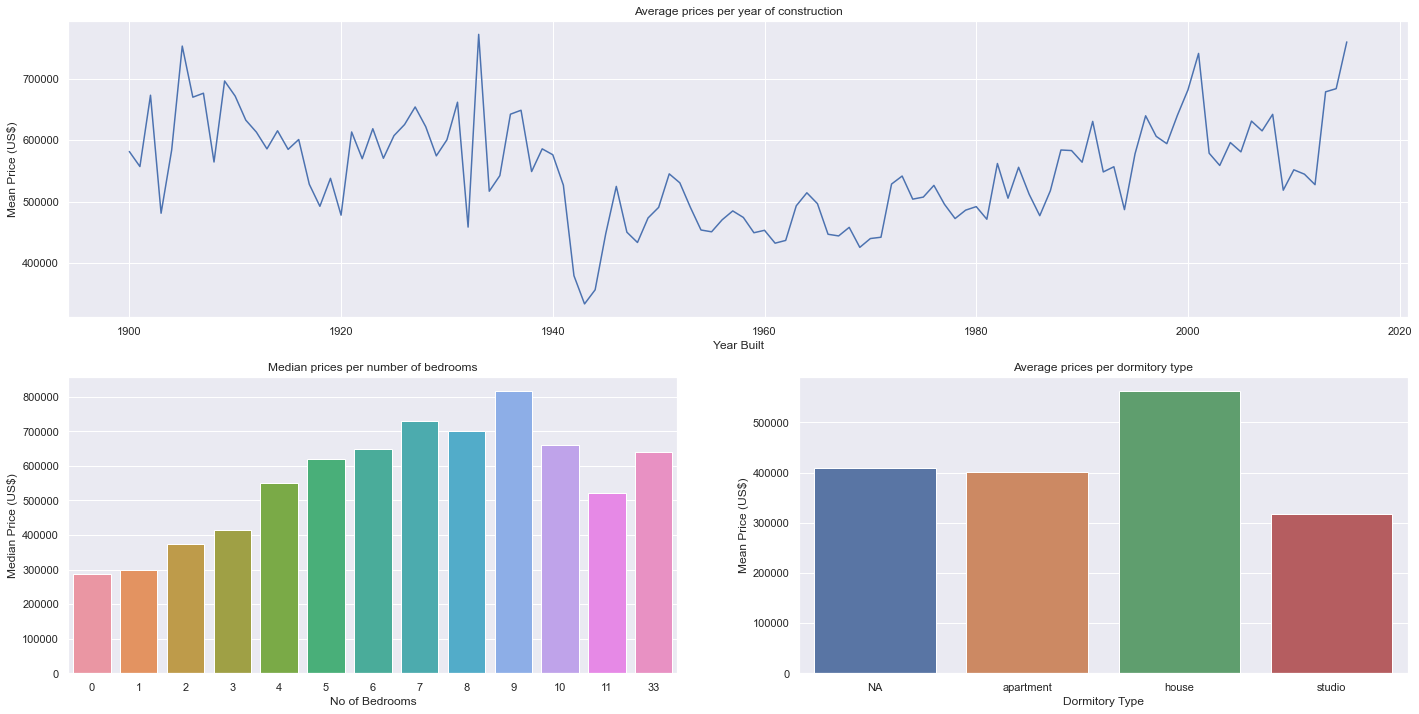

In [105]:
fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, :] ) # first line and both columns
ax2 = fig.add_subplot( specs[1, 0] ) # second line and first column
ax3 = fig.add_subplot( specs[1, 1] ) # second line and second column

# first graph - Average prices per year of construction
df = data.groupby(['yr_built'])['price'].mean().reset_index()
sns.lineplot( x='yr_built', y='price', data=df, ax=ax1 ).set(title='Average prices per year of construction')
ax1.set(xlabel='Year Built', ylabel='Mean Price (US$)')

# second graph - Median prices per number of bedrooms
df = data.groupby(['bedrooms'])['price'].median().reset_index()
sns.barplot( x='bedrooms', y='price', data=df, ax=ax2 ).set(title='Median prices per number of bedrooms')
ax2.set(xlabel='No of Bedrooms', ylabel='Median Price (US$)')

# third graph - Average prices per residence type
df = data.groupby(['dormitory_type'])['price'].mean().reset_index()
sns.barplot( x='dormitory_type', y='price', data=df, ax=ax3 ).set(title='Average prices per residence type')
ax3.set(xlabel='Residence Type', ylabel='Mean Price (US$)')

### 5.1.2 -  Houses Attributes

[Text(0.5, 0, 'Waterfront'), Text(0, 0.5, 'No of Houses')]

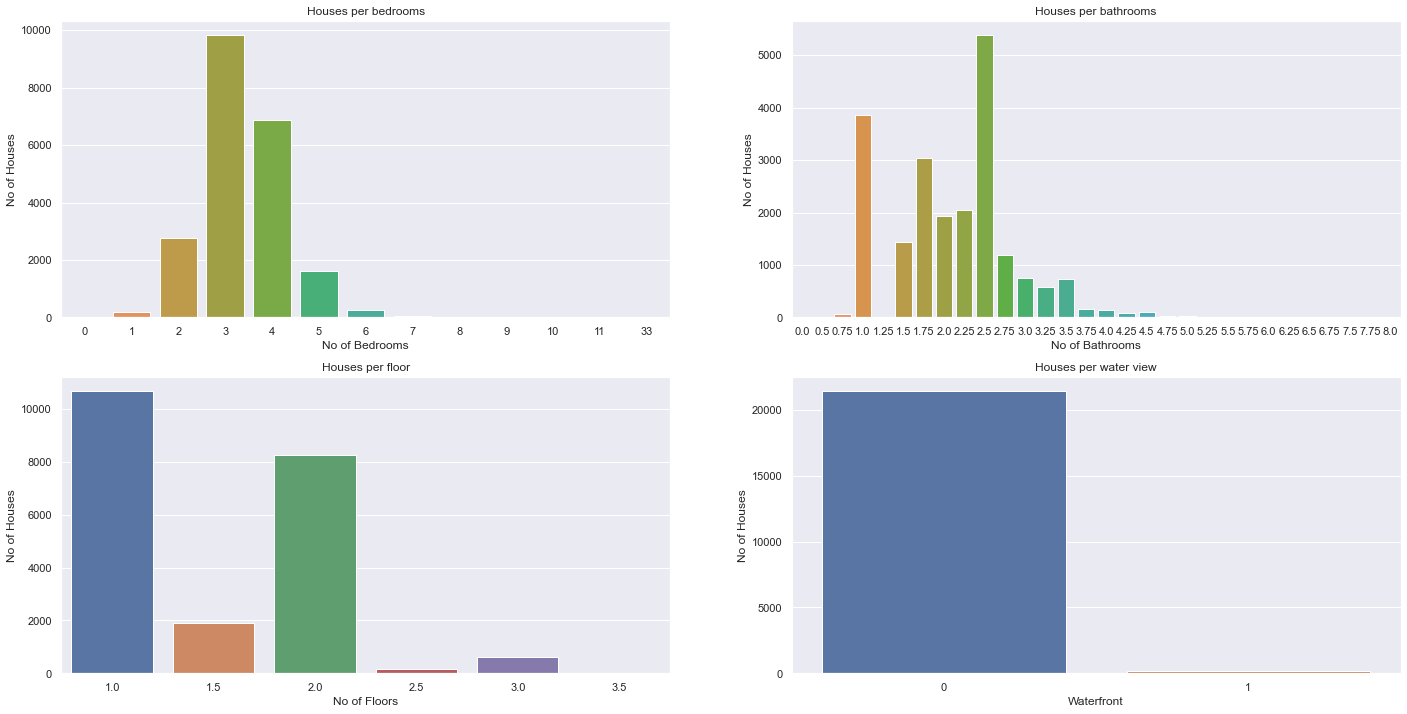

In [97]:
fig = plt.figure( figsize=(24, 12) )
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig )

ax1 = fig.add_subplot( specs[0, 0] ) # first line and first column
ax2 = fig.add_subplot( specs[0, 1] ) # first line and second column
ax3 = fig.add_subplot( specs[1, 0] ) # second line and first column
ax4 = fig.add_subplot( specs[1, 1] ) # second line and second column

# first graph - Number of houses per number of bedrooms
df = data.groupby(['bedrooms'])['id'].count().reset_index()
sns.barplot( x='bedrooms', y='id', data=df, ax=ax1 ).set(title='Houses per bedrooms')
ax1.set(xlabel='No of Bedrooms', ylabel='No of Houses')

# second graph - Number of houses per number of bathrooms
df = data.groupby(['bathrooms'])['id'].count().reset_index()
sns.barplot( x='bathrooms', y='id', data=df, ax=ax2 ).set(title='Houses per bathrooms')
ax2.set(xlabel='No of Bathrooms', ylabel='No of Houses')

# third graph - Number of houses per number of floors
df = data.groupby(['floors'])['id'].count().reset_index()
sns.barplot( x='floors', y='id', data=df, ax=ax3 ).set(title='Houses per floor')
ax3.set(xlabel='No of Floors', ylabel='No of Houses')

# fourth graph - Number of houses per waterfront houses
df = data.groupby(['waterfront'])['id'].count().reset_index()
sns.barplot( x='waterfront', y='id', data=df, ax=ax4 ).set(title='Houses per water view')
ax4.set(xlabel='Waterfront', ylabel='No of Houses')

## 5.2 - Distribution Map

### In the map below the color is defined by the house condition and the point size by the house price. 

### Scatter Maps allow you to visualize geographical data as data points on a map. The map distinguishes data using different colors and sizes for the data points on the map. 

In [84]:
fig = px.scatter_mapbox( data,
                         lat='lat',
                         lon='long',
                         color='condition',
                         size='price',
                         color_continuous_scale=px.colors.cyclical.IceFire,
                         size_max=15,
                         zoom=10 )

fig.update_layout( mapbox_style='open-street-map' )
fig.update_layout( height=600, margin={'r':0, 't':0, 'l':0, 'b':0} )
fig.show()

# 6 - Hypotheses Testing

## We formulated some hypotheses based on the available data, did some calculations, interpreted the results, and decided whether each hypothesis should be rejected or accepted.

## 6.1 - Hypothesis 01

### Waterfront houses are 30% more expensive, on average.

#### TRUE: Waterfront houses are 213% more expensive, on average.

In [107]:
df_h1 = data[['id', 'date', 'price', 'waterfront']].copy()

waterfront_mean = df_h1.groupby(['waterfront'])['price'].mean().reset_index()

waterfront_mean.columns = ['waterfront', 'price_mean']

waterfront_mean

,waterfront,price_mean
0,0,531563.60
1,1,1661876.02


In [108]:
wfront_not_mean = waterfront_mean.loc[0, 'price_mean']
wfront_yes_mean = waterfront_mean.loc[1, 'price_mean']
diff_wf_mean = ((wfront_yes_mean - wfront_not_mean) /  wfront_not_mean)*100
diff_wf_mean = round(diff_wf_mean)

In [109]:
print('TRUE: Waterfront houses are', diff_wf_mean,'% more expensive, on average.') 

TRUE: Waterfront houses are 213 % more expensive, on average.


## 6.2 - Hypothesis 02

### Houses built before 1955 are 50% cheaper, on average.

#### FALSE: Houses built before 1955 are only 1% cheaper, on average.

In [113]:
df_h2 = data[['id', 'date', 'price', 'yr_built']].copy()

df_h2['house_age'] = "NA"

for i in range( 0, len( data ) ):
    if (df_h2.loc[i, 'yr_built'] < 1955):
        df_h2.loc[i, 'house_age'] = 'old'
      
    else:
        df_h2.loc[i, 'house_age'] = 'new'

house_age_mean = df_h2.groupby(['house_age'])['price'].mean().reset_index()

house_age_mean.columns = ['house_age', 'price_mean']

house_age_mean

,house_age,price_mean
0,new,541299.97
1,old,537050.91


In [114]:
new_mean = house_age_mean.at[0, 'price_mean']
old_mean = house_age_mean.at[1, 'price_mean']
diff_house_age_mean = ((new_mean - old_mean) /  new_mean)*100
diff_house_age_mean = round(diff_house_age_mean)

In [115]:
print('FALSE: Houses built before 1955 are only', diff_house_age_mean,'% cheaper, on average.') 

FALSE: Houses built before 1955 are only 1 % cheaper, on average.


## 6.3 - Hypothesis 03

### Houses without basement are 50% bigger, on average.

#### FALSE: Houses without basement are only 23% bigger, on average.

In [116]:
df_h3 = data[['id', 'date', 'price', 'sqft_lot', 'sqft_basement']].copy()

df_h3['basement'] = "NA"

for i in range( 0, len( data ) ):
    if (df_h3.loc[i, 'sqft_basement'] == 0):
        df_h3.loc[i, 'basement'] = 'no'
      
    else:
        df_h3.loc[i, 'basement'] = 'yes'

basement_mean = df_h3.groupby(['basement'])['sqft_lot'].mean().reset_index()

basement_mean.columns = ['basement', 'sqft_lot_mean']
basement_mean

,basement,sqft_lot_mean
0,no,16284.18
1,yes,13286.29


In [117]:
no_mean = basement_mean.loc[0, 'sqft_lot_mean']
yes_mean = basement_mean.loc[1, 'sqft_lot_mean']
diff_basement_mean = ((no_mean - yes_mean) /  yes_mean)*100
diff_basement_mean = round(diff_basement_mean)

In [118]:
print('FALSE: Houses without basement are only', diff_basement_mean,'% bigger, on average.') 

FALSE: Houses without basement are only 23 % bigger, on average.


## 6.4 - Hypothesis 04

### The Year over Year price growth is 10%, on average.
 
#### FALSE: The Year over Year price growth was only 1%, on average.

In [119]:
df_h4 = data[['id', 'date', 'price', 'sqft_basement']].copy()

df_h4['year'] = pd.DatetimeIndex(df_h4['date']).year

year_mean = df_h4.groupby(['year'])['price'].mean().reset_index()

year_mean.columns = ['year', 'price_mean']
year_mean

,year,price_mean
0,2014,539181.43
1,2015,541988.99


In [120]:
year1_mean = year_mean.loc[0, 'price_mean']
year2_mean = year_mean.loc[1, 'price_mean']
yoy_mean = ((year2_mean - year1_mean) /  year1_mean)*100
yoy_mean = round(yoy_mean)

In [121]:
print('FALSE: The Year over Year price growth was only', yoy_mean,'%, on average.') 

FALSE: The Year over Year price growth was only 1 %, on average.


## 6.5 - Hypothesis 05

### Three bathroom houses have a Month on Month price growth on average.

#### FALSE: The Month on Month price growth for 3 bathroom houses was not constant on average.

In [122]:
df_h5 = data[['id', 'date', 'price', 'bathrooms']].copy()

df_h5['date'] = df_h5['date'].astype(str)

df_h5['date'] = df_h5['date'].str[:7]

df_three_bath = df_h5[df_h5['bathrooms'] == 3]

three_bath_mean = df_three_bath.groupby(['date'])['price'].mean().reset_index()

three_bath_mean.columns = ['date', 'price_mean']
three_bath_mean

,date,price_mean
0,2014-05,690080.71
1,2014-06,775057.56
2,2014-07,741405.04
3,2014-08,737576.56
4,2014-09,645246.89
5,2014-10,645523.02
6,2014-11,679910.47
7,2014-12,728341.19
8,2015-01,672923.17
9,2015-02,696714.42


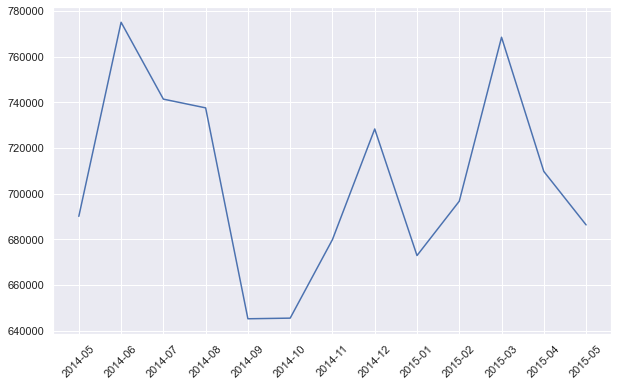

In [135]:
# Graph
plt.figure( figsize=(10, 6) )
plt.plot( three_bath_mean['date'], three_bath_mean['price_mean'] )
plt.xticks( rotation=45 );

In [124]:
print('FALSE: The Month on Month price growth for 3 bathroom houses was not constant on average.') 

FALSE: The Month on Month price growth for 3 bathroom houses was not constant on average.


# 7 - Business Results

## 7.1 - Purchase Recommendation Report

### To decide whether or not each house should be purchased, we compared the house price with the median house price in each Zip Code area. 
### We recommended buying the house whenever the price was lower than the median price and the condition was better than 3.

In [30]:
df_q1 = data[['id', 'date', 'price', 'zipcode', 'condition']].copy()

In [31]:
df_q1x = df_q1.groupby(['zipcode'])['price'].median().reset_index()

In [32]:
df_q1x.columns = ['zipcode', 'price_median']
df_q1x

,zipcode,price_median
0,98001,260000.00
1,98002,235000.00
2,98003,267475.00
3,98004,1150000.00
4,98005,765475.00
...,...,...
65,98177,554000.00
66,98178,278277.00
67,98188,264000.00
68,98198,265000.00


In [33]:
df_q1 = pd.merge(df_q1, df_q1x, on='zipcode', how='inner' )

In [34]:
df_q1['status'] = 'NA'

In [35]:
for i in range( len(data) ):
  if (df_q1.loc[i, 'price'] < df_q1.loc[i, 'price_median']) & (df_q1.loc[i, 'condition'] >= 3):
    df_q1.loc[i, 'status'] = 'buy'
  else:
    df_q1.loc[i, 'status'] = "don't buy"

In [36]:
df_q1.head()

,id,date,price,zipcode,condition,price_median,status
0,7129300520,20141013T000000,221900.00,98178,3,278277.00,buy
1,4060000240,20140623T000000,205425.00,98178,4,278277.00,buy
2,4058801670,20140717T000000,445000.00,98178,3,278277.00,don't buy
3,2976800796,20140925T000000,236000.00,98178,3,278277.00,buy
4,6874200960,20150227T000000,170000.00,98178,3,278277.00,buy


## 7.2 - Sale Price Report

### To calculate the sale price for each house, we compared the house price with the median house price in each Zip Code area and the seasonal influence.
### If the price was lower than the median price, the sale price would be 30% higher than the price. 
### If the price was higher than the median price the sale price would be 10% higher than the price.

In [42]:
df_q2 = data[['id', 'date', 'price', 'zipcode']].copy()

In [43]:
df_q2['month'] = df_q2['date'].dt.month

In [44]:
df_q2['season'] = 'NA'

In [45]:
for i in range( len(data) ):
  if (df_q2.loc[i, 'month'] == 3) | (df_q2.loc[i, 'month'] == 4) | (df_q2.loc[i, 'month'] == 5):
    df_q2.loc[i, 'season'] = 'spring'
  elif (df_q2.loc[i, 'month'] == 6) | (df_q2.loc[i, 'month'] == 7) | (df_q2.loc[i, 'month'] == 8):
    df_q2.loc[i, 'season'] = 'summer'
  elif (df_q2.loc[i, 'month'] == 9) | (df_q2.loc[i, 'month'] == 10) | (df_q2.loc[i, 'month'] == 11):
    df_q2.loc[i, 'season'] = 'fall'
  else:
    df_q2.loc[i, 'season'] = "winter"

In [46]:
df_q2x = df_q2.groupby(['zipcode','season'])['price'].median().reset_index()

In [47]:
df_q2x.columns = ['zipcode', 'season', 'price_median']

In [48]:
df_q2x['zip_season'] = df_q2x['zipcode'].astype(str) + "_" +  df_q2x['season'].astype(str)

In [49]:
df_q2x = df_q2x.drop( ['zipcode', 'season'], axis=1 )

In [50]:
df_q2x.head()

,price_median,zip_season
0,249900.00,98001_fall
1,262000.00,98001_spring
2,262500.00,98001_summer
3,260000.00,98001_winter
4,235000.00,98002_fall


In [51]:
df_q2['zip_season'] = df_q2['zipcode'].astype(str) + "_" +  df_q2['season'].astype(str)

In [52]:
df_q2 = pd.merge( df_q2, df_q2x, on='zip_season', how='inner')

In [53]:
df_q2['sale_price'] = 'NA'

In [54]:
for i in range( len(data) ):
  if (df_q2.loc[i, 'price'] <= df_q2.loc[i, 'price_median']) :
    df_q2.loc[i, 'sale_price'] = df_q2.loc[i, 'price']*1.3
  else:
    df_q2.loc[i, 'sale_price'] = df_q2.loc[i, 'price']*1.1

In [55]:
df_q2.head(3)

,id,date,price,zipcode,month,season,zip_season,price_median,sale_price
0,7129300520,2014-10-13,221900.00,98178,10,fall,98178_fall,290500.00,288470.00
1,2976800796,2014-09-25,236000.00,98178,9,fall,98178_fall,290500.00,306800.00
2,1180003090,2014-09-06,190000.00,98178,9,fall,98178_fall,290500.00,247000.00
